In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
customer_df=pd.read_csv('segmentation data.csv')

In [3]:
customer_df.shape

(2000, 8)

In [4]:
customer_df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [5]:
customer_df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
customer_df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [8]:
customer_df.loc[customer_df['Income']==309364]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
374,100000375,1,1,60,2,309364,2,2


In [9]:
customer_df.loc[customer_df['Income']==35832]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
640,100000641,1,1,27,1,35832,0,0


In [10]:
customer_df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [11]:
customer_df.drop('ID', axis=1, inplace=True)

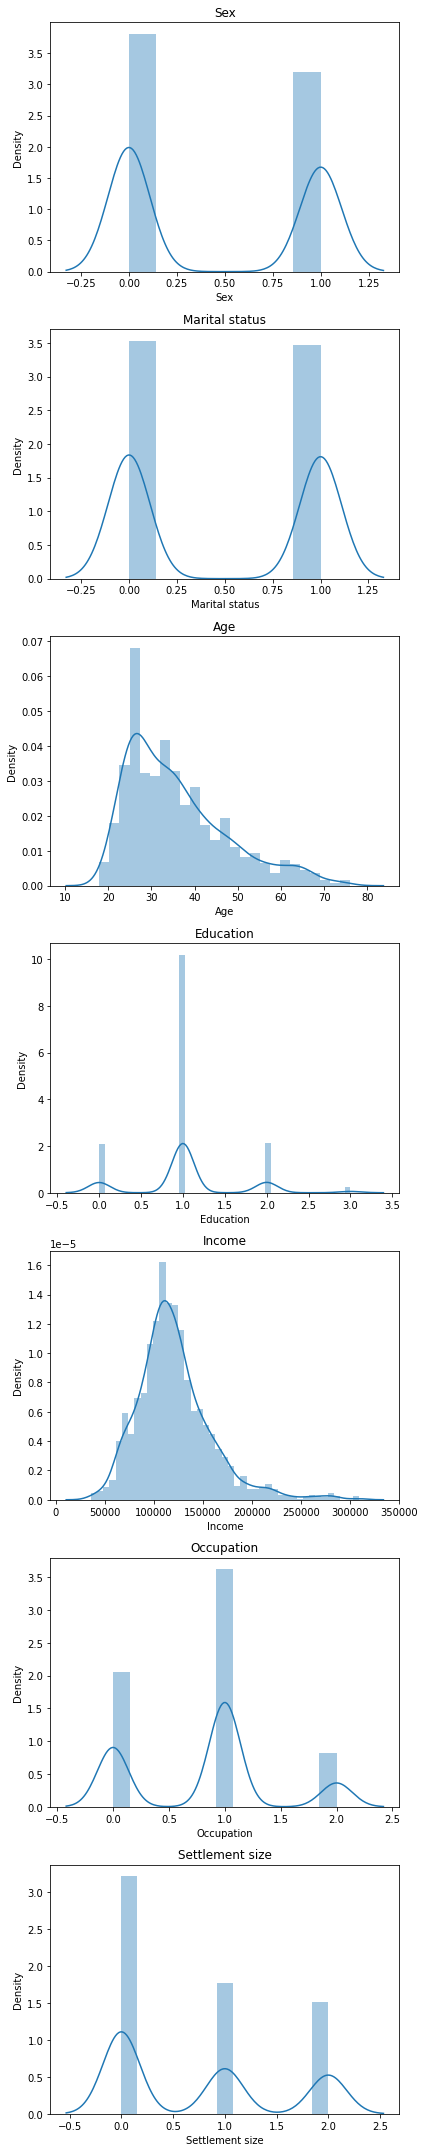

In [12]:
plt.figure(figsize=(6,30))

for i in range(len(customer_df.columns)):
    plt.subplot(7, 1, i+1)
    sns.distplot(customer_df[customer_df.columns[i]])
    plt.title(customer_df.columns[i])
    
plt.tight_layout()

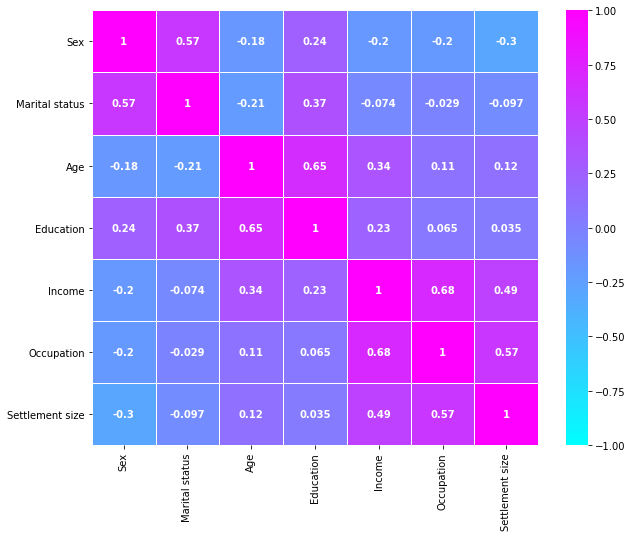

In [13]:
correlations=customer_df.corr()
f, ax=plt.subplots(figsize=(10,8))
sns.heatmap(correlations, annot=True, cmap='cool', center=0, vmin=-1, vmax=1,
           annot_kws={'fontweight':'bold'},
           linewidth=0.5,
           square=False);

In [14]:
scaler = StandardScaler()
customer_df_scaled=scaler.fit_transform(customer_df)

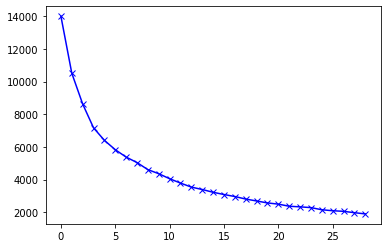

In [15]:
### Elbow method for chosing number of clusters
# kmean.inertia_ Sum of squared distances of samples to their closest cluster center.

scores=[]

range_values=range(1,30)

for i in range_values:
    kmean=KMeans(n_clusters=i)
    kmean.fit(customer_df_scaled)
    scores.append(kmean.inertia_)
    
plt.plot(scores,'bx-')

##### K-Means algorithm

In [16]:
kmeans=KMeans(5)
kmeans.fit(customer_df_scaled)

label=kmeans.labels_

In [17]:
label

array([1, 0, 4, ..., 4, 2, 4])

In [18]:
kmeans.cluster_centers_.shape

(5, 7)

In [19]:
#looking at the centroids values using a dataframe
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_, columns=[customer_df.columns])
cluster_centers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.407845,0.973598,-0.660292,-0.040145,0.162665,0.501888,0.701922
1,0.020502,0.351271,1.727008,1.850376,1.044502,0.572860,0.497880
2,0.756871,1.007025,-0.441755,0.143338,-0.626163,-0.644302,-0.904557
3,-0.908820,-0.993024,0.086916,-0.605017,0.547311,0.691757,0.952595
4,-0.190645,-0.993024,-0.032553,-0.490420,-0.598992,-0.743952,-0.858097


##### Reversing standard scaler transformation to get the actual values for customers to analyse

In [20]:
cluster_centers=scaler.inverse_transform(cluster_centers)

cluster_centers = pd.DataFrame(data=cluster_centers, columns=[customer_df.columns])

cluster_centers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.660167,9.832869e-01,28.172702,1.013928,127151.857939,1.130919,1.309192
1,0.467213,6.721311e-01,56.143443,2.147541,160749.204918,1.176230,1.143443
2,0.834034,1.000000e+00,30.733193,1.123950,97098.056723,0.399160,0.004202
3,0.004274,5.551115e-16,36.927350,0.675214,141806.596154,1.252137,1.512821
4,0.362031,4.440892e-16,35.527594,0.743929,98133.229581,0.335541,0.041943


In [21]:
customer_df_cluster=pd.concat([customer_df, pd.DataFrame({'cluster':label})], axis=1)
customer_df_cluster.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,4
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


###### Interpretation of clusters

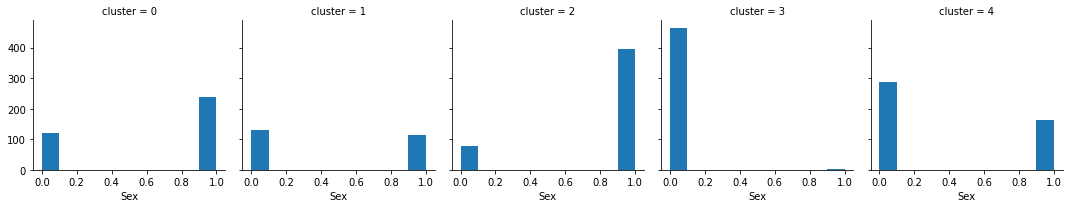

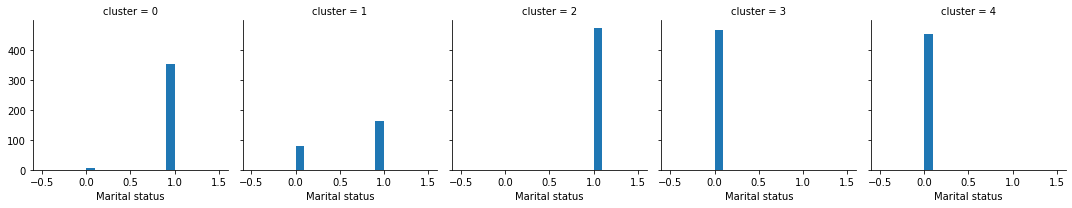

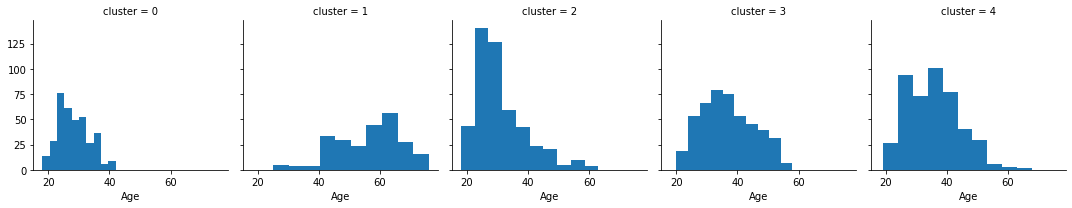

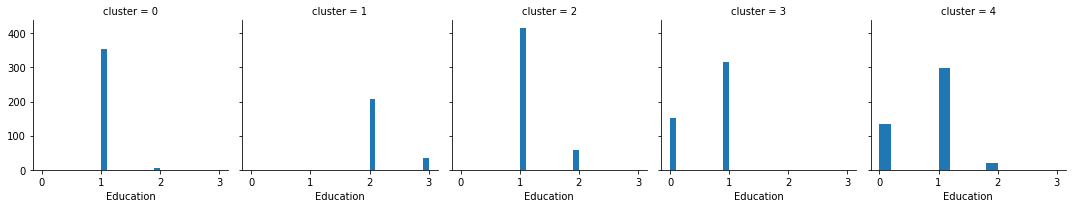

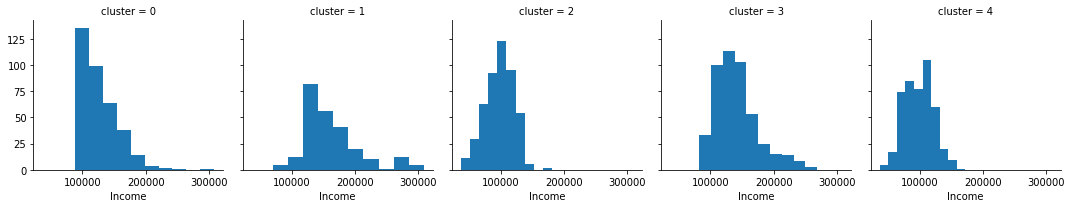

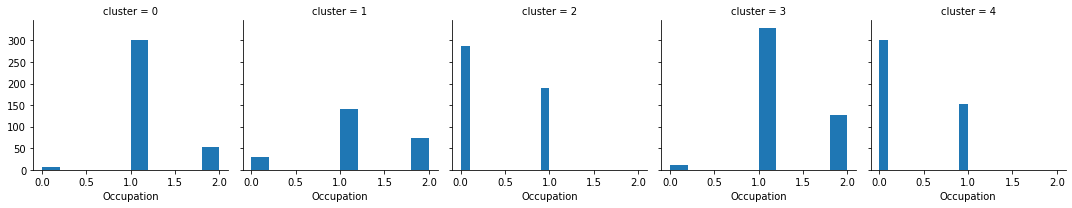

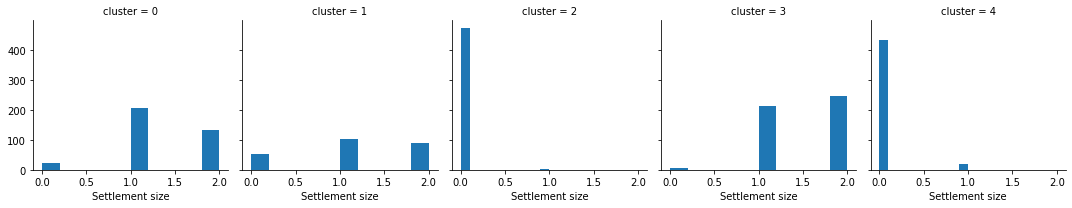

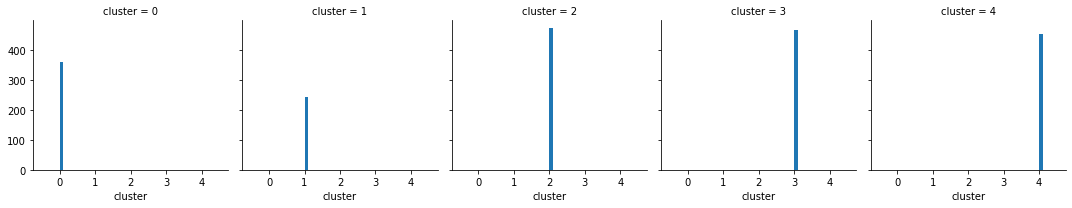

In [22]:
for c in customer_df_cluster:
    grid=sns.FacetGrid(customer_df_cluster, col='cluster')
    grid.map(plt.hist, c)

**Cluster 0**:female & males, majority non-single, 18-42, high-school, >80 000 <350 000skilled employees and manager/self employed, majority mid-size and big cities.

**Cluster 1**:females & males,  single and non-single, 24-76, university and graduate school,  >50 000 <350 000 all occupation, all settlements.

**Cluster 2**:males & majority females , non-single,18-62, high school and university, >35 000 <180 000, unemployed/skilled, skilled employee, small-cities.

**Cluster 3**:males, single,20-58, unknown and high school, >80 000 <280 000all occupation, mid-size and big cities. 

**Cluster 4**:males & females, single,18-70, unknown, high school and university, >35 000 <170 000 unemployed/skilled and skilled employees, small cities

##### Visualization of Clusters

In [23]:
pca = PCA(2)
principal_comp=pca.fit_transform(customer_df_scaled)
principal_comp

array([[ 2.51474593,  0.83412239],
       [ 0.34493528,  0.59814564],
       [-0.65106267, -0.68009318],
       ...,
       [-1.45229829, -2.23593665],
       [-2.24145254,  0.62710847],
       [-1.86688505, -2.45467234]])

In [24]:
pca_df=pd.DataFrame(data=principal_comp, columns=['pca1','pca2'])
pca_df

,pca1,pca2
0,2.514746,0.834122
1,0.344935,0.598146
2,-0.651063,-0.680093
3,1.714316,-0.579927
4,1.626745,-0.440496
...,...,...
1995,-0.866034,0.298330
1996,-1.114957,0.794727
1997,-1.452298,-2.235937
1998,-2.241453,0.627108


In [25]:
pca_df=pd.concat([pca_df, pd.DataFrame({'cluster':label})], axis=1)
pca_df

,pca1,pca2,cluster
0,2.514746,0.834122,1
1,0.344935,0.598146,0
2,-0.651063,-0.680093,4
3,1.714316,-0.579927,3
4,1.626745,-0.440496,3
...,...,...,...
1995,-0.866034,0.298330,4
1996,-1.114957,0.794727,2
1997,-1.452298,-2.235937,4
1998,-2.241453,0.627108,2


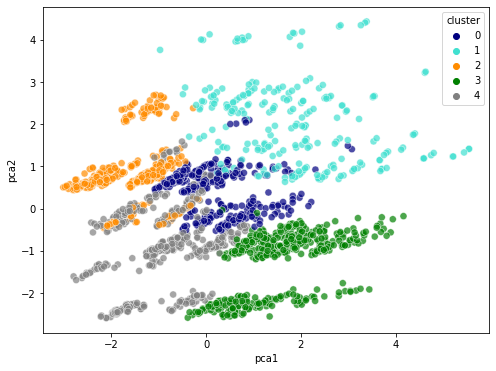

In [33]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, 
                   s=50,
                   alpha=0.7,
                   palette=['navy', 'turquoise', 'darkorange', 'green','gray'])
plt.show()